# Imports 

In [7]:
# Basic pandas and numpy
import pandas as pd
import numpy as np
 
# Basic visualization tools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
 
# Pandas defaults
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
 
# Make jupyter bigger
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))

## Import Dataset

In [8]:
cookies = pd.read_csv('data/cookies.csv')

# EDA

In [9]:
cookies.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,7,raisins,1.30,3
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,7,raisins,1.71,3
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,7,"nuts, chocolate",1.78,3
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,7,chocolate,1.59,3
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,7,"nuts, oats, chocolate",1.30,3


In [10]:
cookies.shape

(5198, 16)

In [11]:
cookies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 16 columns):
sugar to flour ratio    5198 non-null float64
sugar index             5193 non-null float64
bake temp               5198 non-null int64
chill time              5198 non-null float64
calories                5198 non-null float64
density                 5198 non-null float64
pH                      5198 non-null float64
grams baking soda       5198 non-null float64
bake time               5188 non-null float64
quality                 5198 non-null int64
butter type             5198 non-null object
weight                  5198 non-null float64
diameter                5198 non-null int64
mixins                  5196 non-null object
crunch factor           5198 non-null float64
aesthetic appeal        5198 non-null int64
dtypes: float64(10), int64(4), object(2)
memory usage: 649.8+ KB


In [12]:
cookies.isna().sum()

sugar to flour ratio     0
sugar index              5
bake temp                0
chill time               0
calories                 0
density                  0
pH                       0
grams baking soda        0
bake time               10
quality                  0
butter type              0
weight                   0
diameter                 0
mixins                   2
crunch factor            0
aesthetic appeal         0
dtype: int64

As there are not many null values, we decide to drop those rows

In [13]:
cookies.dropna(inplace=True)

## Variable exploration

### Target variable

This seems like a Classification problem (multiclassification), where our target variable is Quality. Let's explore it:

In [14]:
cookies.quality.value_counts()

8     1778
7     1316
9      706
6      614
5      575
10     135
4       44
3        8
11       5
Name: quality, dtype: int64

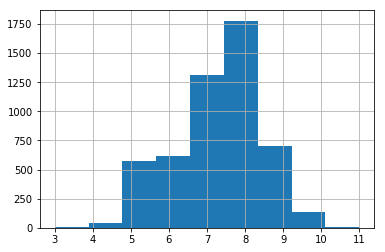

In [15]:
cookies.quality.hist(bins=9)

Lots of 7 an 8. Few extreme values and no 0, 1 or 2

There are a lot of categories, so we will deal with this problem in the F. Engineering part

### Numerical variables 

In [16]:
cookies.describe().T

,count,mean,std,min,25%,50%,75%,max
sugar to flour ratio,5181.0,0.318215,0.149769,0.00000,0.2400,0.3100,0.39000,3.0
sugar index,5181.0,5.401718,4.669065,0.60000,1.8000,3.0000,8.00000,31.6
bake temp,5181.0,559.496236,353.265184,90.00000,380.0000,470.0000,640.00000,6110.0
chill time,5181.0,30.383903,17.249170,0.00000,17.0000,29.0000,41.00000,146.5
calories,5181.0,115.022679,56.468852,-99.00000,76.0000,118.0000,155.00000,366.5
density,5181.0,0.995435,0.055723,0.98711,0.9923,0.9948,0.99691,5.0
pH,5181.0,8.221892,0.283618,7.72000,8.1100,8.2100,8.32000,25.0
grams baking soda,5181.0,0.531002,0.151002,0.22000,0.4300,0.5100,0.60000,2.0
bake time,5181.0,10.495561,1.194958,8.00000,9.5000,10.3000,11.30000,14.9
quality,5181.0,7.325613,1.302336,3.00000,7.0000,8.0000,8.00000,11.0


Diameter is a redundant variable, as it is 7 for all the rows. We drop it

In [37]:
cookies.drop(columns = ['diameter'], inplace=True)

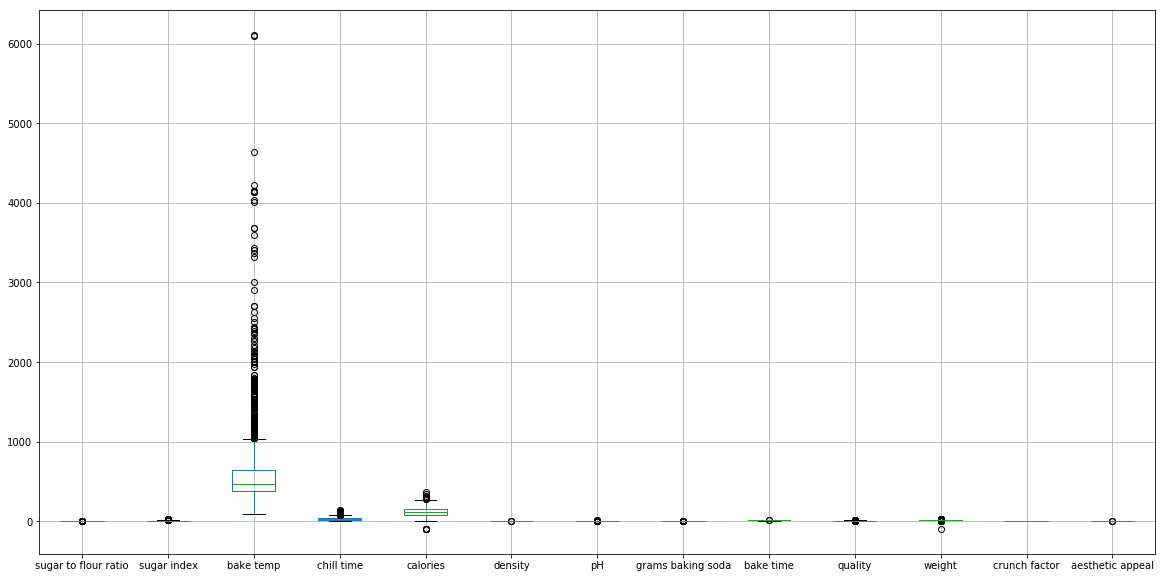

In [38]:
plt.figure(figsize= (20, 10))
cookies.boxplot()

Notes:
Bake Temperature has a lot of outliers. We will investigate

But first we will plot the rest of variables for scale reasons

In [39]:
a = list(cookies.columns)
print(a)

['sugar to flour ratio', 'sugar index', 'bake temp', 'chill time', 'calories', 'density', 'pH', 'grams baking soda', 'bake time', 'quality', 'butter type', 'weight', 'mixins', 'crunch factor', 'aesthetic appeal']


In [40]:
a = [i for i in a if i != ['bake temp', 'butter type', 'mixins']]

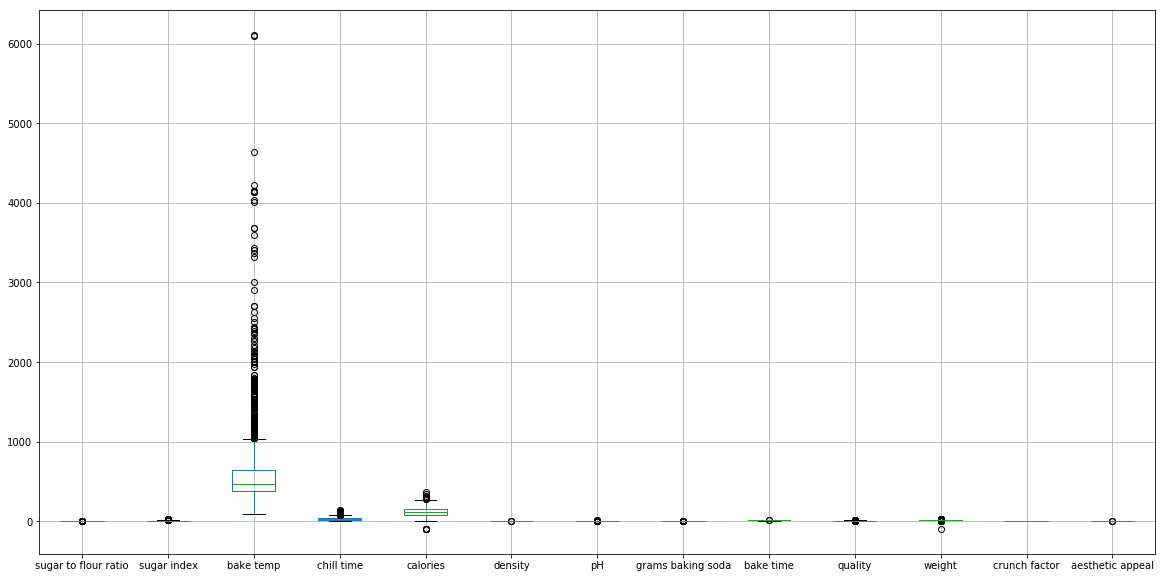

In [41]:
plt.figure(figsize= (20, 10))
cookies[a].boxplot()

Notes:
* Calories and Weight cannot be negative

#### pH 

Lets have a close look at pH, which must be in the 0-14 range

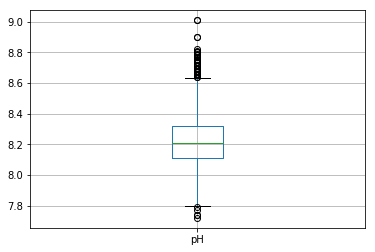

In [42]:
cookies[['pH']].boxplot()

We decided to approximate the pH error to the mean:

In [43]:
cookies.pH[cookies.pH > 14] = cookies.pH.mean()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Bake Temperature 

There are a lot of outliers in the high range:


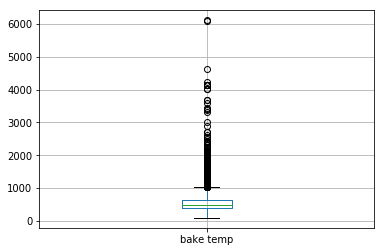

In [44]:
cookies[['bake temp']].boxplot()

In [45]:
cookies['bake temp'].loc[cookies['bake temp'] > 5000].shape

(2,)

We decided to approximate the values higher than 5000 to the mean:

#### Correlation Matrix

In [46]:
cookies_num = cookies.select_dtypes(include= ['float64','int64'])

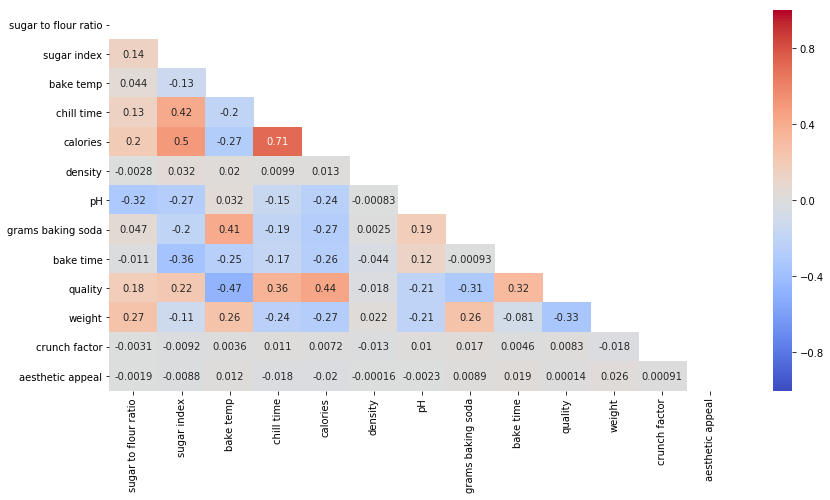

In [47]:
cormat = cookies_num.corr()
figsize = (14, 7)
vmin= -1 # Sets maximum color
vmax= 1 # Sets minimum color
cmap = 'coolwarm' # Palette
# Create mask for upper half:
mask = np.zeros_like(cormat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Plot figure:
plt.figure(figsize=figsize)
sns.heatmap(cormat,
vmin=vmin, vmax=vmax,
cmap=cmap,
annot=True,
mask= mask)

### Categorical

Butter type

Mixings

In [48]:
for i in ['butter type', 'mixins']:
    print(i)
    display(cookies[i].value_counts())

butter type


melted    3908
cubed     1273
Name: butter type, dtype: int64

mixins


chocolate                         1892
raisins                           1196
chocolate, oats                    745
nuts, chocolate                    519
nuts,raisins                       331
nuts, oats, chocolate              293
nuts, oats                         107
chocolate, peanut butter            52
raisins, oats                       24
peanut butter                       15
oats                                 4
chocolate, oats, peanut butter       2
peanut butter, raisins               1
Name: mixins, dtype: int64

There are a few different values but all of them are a combination of the following elements:
* raisins
* nuts
* chocolate
* oats
* peanut butter

We will deal with this later in the feature engineering part